# 관세청-AI융합 우범화물 탐지 AI 경진대회

## 1. 분석 환경 설정 및 데이터 로딩

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import matplotlib.pyplot as plt

# 한글폰트 적용
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [3]:
# train 데이터 로딩
df_org = pd.read_csv('./train.csv')
df_org

,id,신고번호,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,...,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,0,97061800,2020-01-01,30,B,11,21,11,10,ZZR1LT6,...,4408909195,BE,BE,0.0,FEU1,G,108.0,372254.40,0,0
1,1,85945189,2020-01-01,40,B,11,21,11,40,SWF9S4X,...,6907221000,CN,CN,8.0,A,Y,11352.0,375751.20,0,0
2,2,77854751,2020-01-01,20,B,11,21,11,40,X4XT6P8,...,6208221000,CN,CN,5.2,FCN1,B,20.7,5353.02,0,0
3,3,46925060,2020-01-01,40,B,11,21,43,40,K7LCQTZ,...,9403501000,VN,VN,0.0,C,Y,9218.0,1477645.40,0,0
4,4,34131149,2020-01-01,20,B,11,21,11,10,1HMVIVH,...,710807000,VN,VN,27.0,A,B,24000.0,6364800.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37380,37380,78236084,2020-12-31,40,B,11,21,43,40,NZYZ967,...,3926909000,CN,CN,6.5,C,Y,573.0,343.80,1,1
37381,37381,13057608,2020-12-31,20,B,93,31,43,10,RSUWWQ2,...,4016999000,CN,CN,4.8,FCN1,G,1938.0,35077.80,1,1
37382,37382,32316450,2020-12-31,40,B,11,21,11,10,ZOAPZF5,...,8504405090,CN,CN,4.9,CIT,S,50.0,3105.00,0,0
37383,37383,62223974,2020-12-31,20,B,11,21,11,40,09EO87L,...,7204210000,CA,CA,0.0,A,B,20502.0,311630.40,0,0


In [4]:
df_org.shape
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37385 entries, 0 to 37384
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         37385 non-null  int64  
 1   신고번호       37385 non-null  int64  
 2   신고일자       37385 non-null  object 
 3   신고세관부호     37385 non-null  int64  
 4   수입신고구분코드   37385 non-null  object 
 5   수입거래구분코드   37385 non-null  int64  
 6   수입종류코드     37385 non-null  int64  
 7   징수형태코드     37385 non-null  int64  
 8   운송수단유형코드   37385 non-null  int64  
 9   신고인부호      37385 non-null  object 
 10  수입자        37385 non-null  object 
 11  해외거래처부호    33670 non-null  object 
 12  특송업체부호     6714 non-null   object 
 13  HS10단위부호   37385 non-null  int64  
 14  적출국가코드     37385 non-null  object 
 15  원산지국가코드    37385 non-null  object 
 16  관세율        37385 non-null  float64
 17  관세율구분코드    37385 non-null  object 
 18  원산지표시유무코드  37385 non-null  object 
 19  신고중량(KG)   37385 non-null  float64
 20  과세가격원화

In [5]:
# public 데이터 로딩
df_public = pd.read_csv('./public.csv')

# 신고번호 저장
public_result = pd.DataFrame()
public_result['신고번호'] = df_public['신고번호']

In [6]:
df_public

,id,신고번호,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,...,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액
0,0,56839011,2021-01-01,40,B,11,11,11,40,76NV527,...,249LO7A,NaN,7607119000,CN,CN,7.2,FCN1,E,901.2,415092.72
1,1,64859691,2021-01-01,20,B,11,21,11,10,IP2CUKX,...,K6GNOK5,NaN,3215909000,HK,CN,0.0,FCN1,E,400.0,30520.00
2,2,99950077,2021-01-01,30,B,11,21,14,10,XCIAAPR,...,50REPV8,NaN,6505009090,CN,CN,3.2,FCN1,S,339.0,2610.30
3,3,22601387,2021-01-01,20,B,11,21,11,40,WOGOUHN,...,JX54LI8,NaN,6208921000,CN,CN,13.0,A,E,30.0,2478.00
4,4,33240058,2021-01-02,16,B,11,21,11,40,BROGNIT,...,TMJHZV9,NaN,9031809070,US,US,1.3,CIT,B,3.0,86125.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8129,8129,95650431,2021-03-31,40,B,11,21,11,10,CAJMKA7,...,XC641JQ,LM3SJ4,4202922000,CN,CN,4.8,FCN1,S,930.0,55335.00
8130,8130,48093440,2021-03-31,30,B,11,21,11,10,S1N2WHR,...,DRN66N3,NaN,3825900000,KR,KR,6.5,C,S,5430.0,28236.00
8131,8131,12889495,2021-03-31,20,B,86,21,11,40,LP6EWRR,...,3T5GEL3,NaN,9018909090,JP,KR,8.0,A,G,93.5,4703.05
8132,8132,39908806,2021-03-31,40,B,11,21,18,40,PF1L1IG,...,ONFDJOV,MWIDNS,6203429000,MY,MY,0.0,FAS1,E,717.0,197461.80


In [7]:
# private 데이터 로딩
df_private = pd.read_csv('./private.csv')

# 신고번호 저장
private_result = pd.DataFrame()
private_result['신고번호'] = df_private['신고번호']

In [8]:
df_private

,id,신고번호,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,...,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액
0,0,41256141,2021-04-01,40,B,11,21,11,40,LPA7LKZ,...,FQKH1PD,NaN,4202311090,IT,RO,8.0,A,G,1.0,1.248700e+03
1,1,20889431,2021-04-01,20,B,11,21,11,10,NZYZ967,...,543HRUP,NaN,7113110000,TH,TH,8.0,A,Y,4.7,1.365350e+03
2,2,25403940,2021-04-01,40,B,11,21,11,10,69Z0KLV,...,NaN,NaN,3906909000,CN,CN,2.4,FCN1,G,19000.0,1.105800e+06
3,3,43489778,2021-04-01,62,B,11,21,43,40,TF25D2Q,...,LFV52UK,NaN,3926909000,CN,CN,6.5,C,G,275.0,1.650000e+02
4,4,94895240,2021-04-01,40,B,11,21,11,40,1U0VYZN,...,JABE2FY,NaN,8713900000,CN,CN,0.0,C,E,42.0,1.139376e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,8476,25225594,2021-06-30,40,B,87,21,18,40,BUK2SI8,...,SLSEZ3Z,VZIZJJ,8443991000,SG,CN,0.0,C,Y,2.2,1.463000e+02
8477,8477,17739793,2021-06-30,40,B,11,21,11,10,44F36R4,...,CYZWE17,NaN,9603290000,CN,CN,3.2,FCN1,B,121.2,3.842040e+03
8478,8478,70427265,2021-06-30,33,B,11,21,11,50,EJW9AY4,...,GKMVJ7I,8AYC3X,307493090,CN,CN,12.0,FCN1,Y,21450.0,1.186078e+08
8479,8479,60306302,2021-06-30,20,B,11,21,11,10,7GHJ33J,...,8XUBNSN,NaN,8517623390,CN,CN,0.0,C,B,25.4,6.910349e+05


## 2. 데이터 전처리

In [9]:
df_org['우범여부'].value_counts()

0    29271
1     8114
Name: 우범여부, dtype: int64

In [10]:
df_org['핵심적발'].value_counts()

0    29271
1     7720
2      394
Name: 핵심적발, dtype: int64

In [11]:
# 예측 결과 중요도가 낮은 열 삭제
# 테스트 1 (8/2)
del df_org['id']
del df_org['신고번호']
del df_org['신고일자']
del df_org['수입자']
del df_org['신고인부호']
del df_org['해외거래처부호']
# 테스트 2 (8/3)
del df_org['수입신고구분코드']
del df_org['수입종류코드']
del df_org['운송수단유형코드']
# 테스트 3 (8/4)
del df_org['수입거래구분코드']
del df_org['특송업체부호']

In [12]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37385 entries, 0 to 37384
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   신고세관부호     37385 non-null  int64  
 1   징수형태코드     37385 non-null  int64  
 2   HS10단위부호   37385 non-null  int64  
 3   적출국가코드     37385 non-null  object 
 4   원산지국가코드    37385 non-null  object 
 5   관세율        37385 non-null  float64
 6   관세율구분코드    37385 non-null  object 
 7   원산지표시유무코드  37385 non-null  object 
 8   신고중량(KG)   37385 non-null  float64
 9   과세가격원화금액   37385 non-null  float64
 10  우범여부       37385 non-null  int64  
 11  핵심적발       37385 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.4+ MB


In [13]:
df_org

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,30,11,4408909195,BE,BE,0.0,FEU1,G,108.0,372254.40,0,0
1,40,11,6907221000,CN,CN,8.0,A,Y,11352.0,375751.20,0,0
2,20,11,6208221000,CN,CN,5.2,FCN1,B,20.7,5353.02,0,0
3,40,43,9403501000,VN,VN,0.0,C,Y,9218.0,1477645.40,0,0
4,20,11,710807000,VN,VN,27.0,A,B,24000.0,6364800.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37380,40,43,3926909000,CN,CN,6.5,C,Y,573.0,343.80,1,1
37381,20,43,4016999000,CN,CN,4.8,FCN1,G,1938.0,35077.80,1,1
37382,40,11,8504405090,CN,CN,4.9,CIT,S,50.0,3105.00,0,0
37383,20,11,7204210000,CA,CA,0.0,A,B,20502.0,311630.40,0,0


In [14]:
# 예측 결과 중요도가 낮은 열 삭제
# 테스트 1 (8/2)
del df_public['id']
del df_public['신고번호']
del df_public['신고일자']
del df_public['수입자']
del df_public['신고인부호']
del df_public['해외거래처부호']
# 테스트 2 (8/3)
del df_public['수입신고구분코드']
del df_public['수입종류코드']
del df_public['운송수단유형코드']
# 테스트 3 (8/4)
del df_public['수입거래구분코드']
del df_public['특송업체부호']

In [15]:
df_public

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액
0,40,11,7607119000,CN,CN,7.2,FCN1,E,901.2,415092.72
1,20,11,3215909000,HK,CN,0.0,FCN1,E,400.0,30520.00
2,30,14,6505009090,CN,CN,3.2,FCN1,S,339.0,2610.30
3,20,11,6208921000,CN,CN,13.0,A,E,30.0,2478.00
4,16,11,9031809070,US,US,1.3,CIT,B,3.0,86125.20
...,...,...,...,...,...,...,...,...,...,...
8129,40,11,4202922000,CN,CN,4.8,FCN1,S,930.0,55335.00
8130,30,11,3825900000,KR,KR,6.5,C,S,5430.0,28236.00
8131,20,11,9018909090,JP,KR,8.0,A,G,93.5,4703.05
8132,40,18,6203429000,MY,MY,0.0,FAS1,E,717.0,197461.80


In [16]:
# 예측 결과 중요도가 낮은 열 삭제
# 테스트 1 (8/2)
del df_private['id']
del df_private['신고번호']
del df_private['신고일자']
del df_private['수입자']
del df_private['신고인부호']
del df_private['해외거래처부호']
# 테스트 2 (8/3)
del df_private['수입신고구분코드']
del df_private['수입종류코드']
del df_private['운송수단유형코드']
# 테스트 3 (8/4)
del df_private['수입거래구분코드']
del df_private['특송업체부호']

In [17]:
df_private

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액
0,40,11,4202311090,IT,RO,8.0,A,G,1.0,1.248700e+03
1,20,11,7113110000,TH,TH,8.0,A,Y,4.7,1.365350e+03
2,40,11,3906909000,CN,CN,2.4,FCN1,G,19000.0,1.105800e+06
3,62,43,3926909000,CN,CN,6.5,C,G,275.0,1.650000e+02
4,40,11,8713900000,CN,CN,0.0,C,E,42.0,1.139376e+05
...,...,...,...,...,...,...,...,...,...,...
8476,40,18,8443991000,SG,CN,0.0,C,Y,2.2,1.463000e+02
8477,40,11,9603290000,CN,CN,3.2,FCN1,B,121.2,3.842040e+03
8478,33,11,307493090,CN,CN,12.0,FCN1,Y,21450.0,1.186078e+08
8479,20,11,8517623390,CN,CN,0.0,C,B,25.4,6.910349e+05


In [18]:
# train, public, private 데이터를 합친 후 수치형 변수 삭제
from sklearn.preprocessing import LabelEncoder

df_encode = pd.concat([df_public, df_private, df_org.iloc[:,:-2]], axis=0)
df_encode = df_encode.drop(['관세율', '신고중량(KG)', '과세가격원화금액'], axis=1)

df_encode

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드
0,40,11,7607119000,CN,CN,FCN1,E
1,20,11,3215909000,HK,CN,FCN1,E
2,30,14,6505009090,CN,CN,FCN1,S
3,20,11,6208921000,CN,CN,A,E
4,16,11,9031809070,US,US,CIT,B
...,...,...,...,...,...,...,...
37380,40,43,3926909000,CN,CN,C,Y
37381,20,43,4016999000,CN,CN,FCN1,G
37382,40,11,8504405090,CN,CN,CIT,S
37383,20,11,7204210000,CA,CA,A,B


In [19]:
# 범주형 변수 label encoding 후 분할
encoder = LabelEncoder()
df_encode.loc[:,:] = \
df_encode.loc[:,:].apply(encoder.fit_transform)

df_public_label = df_encode.iloc[:8134, :]
df_public_label = pd.concat([df_public_label, df_public.loc[:,['관세율', '신고중량(KG)', '과세가격원화금액']]], axis=1)
df_private_label = df_encode.iloc[8134:16615, :]
df_private_label = pd.concat([df_private_label, df_private.loc[:,['관세율', '신고중량(KG)', '과세가격원화금액']]], axis=1)
df_label = df_encode.iloc[16615:, :]
df_label = pd.concat([df_label, df_org.loc[:,['관세율', '신고중량(KG)', '과세가격원화금액', '우범여부', '핵심적발']]], axis=1)

In [20]:
# 수치형 변수를 자연로그로 변환
for var in ['신고중량(KG)', '과세가격원화금액']:
    df_label[var] = df_label[var].apply(lambda x: np.log1p(x))
    df_public_label[var] = df_public_label[var].apply(lambda x: np.log1p(x))
    df_private_label[var] = df_private_label[var].apply(lambda x: np.log1p(x))

In [21]:
df_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,9,2,1221,7,8,26,2,0.0,4.691348,12.827335,0,0
1,13,2,1918,15,19,0,5,8.0,9.337237,12.836685,0,0
2,6,2,1732,15,19,18,0,5.2,3.077312,8.585603,0,0
3,13,9,3406,98,114,1,5,0.0,9.129022,14.205961,0,0
4,6,2,141,98,114,0,0,27.0,10.085851,15.666294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37380,13,9,1075,15,19,1,5,6.5,6.352629,5.842965,1,1
37381,6,9,1124,15,19,18,2,4.8,7.569928,10.465352,1,1
37382,13,2,2747,15,19,5,4,4.9,3.931826,8.041091,0,0
37383,6,2,2035,12,15,0,0,0.0,9.928326,12.649576,0,0


In [22]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37385 entries, 0 to 37384
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   신고세관부호     37385 non-null  int64  
 1   징수형태코드     37385 non-null  int64  
 2   HS10단위부호   37385 non-null  int64  
 3   적출국가코드     37385 non-null  int64  
 4   원산지국가코드    37385 non-null  int64  
 5   관세율구분코드    37385 non-null  int64  
 6   원산지표시유무코드  37385 non-null  int64  
 7   관세율        37385 non-null  float64
 8   신고중량(KG)   37385 non-null  float64
 9   과세가격원화금액   37385 non-null  float64
 10  우범여부       37385 non-null  int64  
 11  핵심적발       37385 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.7 MB


In [23]:
df_public_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액
0,13,2,2190,15,19,18,1,7.2,6.804836,12.936260
1,6,2,786,37,19,18,1,0.0,5.993961,10.326170
2,9,5,1851,15,19,18,4,3.2,5.828946,7.867603
3,6,2,1736,15,19,0,1,13.0,3.433987,7.815611
4,4,2,3308,95,111,5,0,1.3,1.386294,11.363569
...,...,...,...,...,...,...,...,...,...,...
8129,13,2,1165,15,19,18,4,4.8,6.836259,10.921179
8130,9,2,948,50,55,1,4,6.5,8.599879,10.248388
8131,6,2,3234,47,55,0,2,8.0,4.548600,8.456179
8132,13,6,1685,64,74,10,1,0.0,6.576470,12.193305


In [24]:
df_private_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액
0,13,2,1154,46,91,0,2,8.0,0.693147,7.130659
1,6,2,2018,88,104,0,5,8.0,1.740466,7.219898
2,13,2,970,15,19,18,2,2.4,9.852247,13.916081
3,21,9,1075,15,19,1,2,6.5,5.620401,5.111988
4,13,2,3112,15,19,1,1,0.0,3.761200,11.643415
...,...,...,...,...,...,...,...,...,...,...
8476,13,6,2510,85,19,1,5,0.0,1.163151,4.992471
8477,13,2,3504,15,19,18,0,3.2,4.805659,8.254019
8478,10,2,81,15,19,18,5,12.0,9.973527,18.591333
8479,6,2,2838,15,19,1,0,0.0,3.273364,13.445947


In [25]:
# train 데이터를 훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

x = df_label.loc[:, (df_label.columns != '우범여부') & (df_label.columns != '핵심적발')]
y_c = df_label['우범여부']

## 3. XGBoost 모델 생성 및 훈련

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [27]:
# 모델 성능 평가를 위해 stratifiedKFold 방식 사용
# XGBoost 모델 훈련 (n_estimators=4000, learning_rate=0.1,max_depth=10)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

xgb_c = XGBClassifier(n_estimators=4000, learning_rate=0.1, max_depth=10)

skfold = StratifiedKFold(n_splits=5)
idx_iter=0
cv_roc_score=[]

for train_index, test_index in skfold.split(x, y_c):
    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
    y_c_train, y_c_test = y_c.iloc[train_index], y_c.iloc[test_index]
    
    xgb_c.fit(x_train, y_c_train, early_stopping_rounds = 100, eval_set = [(x_train, y_c_train), (x_test, y_c_test)], eval_metric = 'auc', verbose = 200)
    xgb_c_pred = xgb_c.predict(x_test)
    
    idx_iter += 1
    roc_score = roc_auc_score(y_c_test, xgb_c_pred)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print("\n#{0} 학습 데이터 크기: {1}, 검증 데이터 크기: {2}".format(idx_iter, train_size, test_size))
    print("#{0} 검증 세트 인덱스 :{1}".format(idx_iter, test_index))
    cv_roc_score.append(roc_score)

[0]	validation_0-auc:0.73017	validation_1-auc:0.67658
[200]	validation_0-auc:0.99405	validation_1-auc:0.90857
[400]	validation_0-auc:0.99916	validation_1-auc:0.91877
[600]	validation_0-auc:0.99979	validation_1-auc:0.92313
[800]	validation_0-auc:0.99992	validation_1-auc:0.92509
[1000]	validation_0-auc:0.99996	validation_1-auc:0.92681
[1200]	validation_0-auc:0.99998	validation_1-auc:0.92768
[1400]	validation_0-auc:0.99998	validation_1-auc:0.92797
[1436]	validation_0-auc:0.99998	validation_1-auc:0.92827

#1 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#1 검증 세트 인덱스 :[   0    1    2 ... 7480 7482 7483]
[0]	validation_0-auc:0.72792	validation_1-auc:0.66352
[200]	validation_0-auc:0.99338	validation_1-auc:0.89929
[400]	validation_0-auc:0.99895	validation_1-auc:0.91416
[600]	validation_0-auc:0.99971	validation_1-auc:0.91781
[800]	validation_0-auc:0.99988	validation_1-auc:0.92121
[1000]	validation_0-auc:0.99994	validation_1-auc:0.92276
[1093]	validation_0-auc:0.99995	validation_1-auc:0.92249

#2 학습 데이터 크기:

In [28]:
# 모델 성능 평가
from sklearn.metrics import classification_report

print(classification_report(y_c_test, xgb_c_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5854
           1       0.89      0.72      0.79      1623

    accuracy                           0.92      7477
   macro avg       0.91      0.85      0.87      7477
weighted avg       0.92      0.92      0.92      7477



In [29]:
# 테스트 데이터 우범 화물 개수
y_c_test.value_counts()

0    5854
1    1623
Name: 우범여부, dtype: int64

In [30]:
# 예측 결과 우범 화물 개수 비교
import collections

collections.Counter(xgb_c_pred)

Counter({1: 1308, 0: 6169})

In [31]:
xgb_c_pred

array([1, 1, 1, ..., 0, 0, 0])

In [32]:
y_c_test

29755    1
29758    1
29759    1
29761    1
29762    1
        ..
37380    1
37381    1
37382    0
37383    0
37384    0
Name: 우범여부, Length: 7477, dtype: int64

In [33]:
# 테스트 데이터와 예측 결과 비교
y_c_test.to_numpy()

collections.Counter(y_c_test == xgb_c_pred)

Counter({True: 6870, False: 607})

In [34]:
# 핵심적발 예측을 위한 훈련, 테스트 데이터 분리
x = df_label.loc[:, df_label.columns != '핵심적발']
y_k = df_label['핵심적발']

In [35]:
# 모델 성능 평가를 위해 stratifiedKFold 방식 사용
# XGBoost 모델 훈련 (n_estimators=4000, learning_rate=0.1,max_depth=10)
xgb_k = XGBClassifier(n_estimators=4000, learning_rate=0.1, max_depth=10)

skfold = StratifiedKFold(n_splits=5)
idx_iter=0
cv_roc_score=[]

for train_index, test_index in skfold.split(x, y_k):
    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
    y_k_train, y_k_test = y_k.iloc[train_index], y_k.iloc[test_index]
    
    xgb_k.fit(x_train, y_k_train, early_stopping_rounds = 100, eval_set = [(x_train, y_k_train), (x_test, y_k_test)], eval_metric = 'auc', verbose = 200)
    xgb_k_pred = xgb_k.predict(x_test)
    
    idx_iter += 1
#     roc_score = roc_auc_score(y_k_test, xgb_k_pred, multi_class='raise')
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
#     print("\n#{0} 교차 검증 auc_score :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}".format(idx_iter, roc_score, train_size, test_size))
    print("\n#{0} 학습 데이터 크기: {1}, 검증 데이터 크기: {2}".format(idx_iter, train_size, test_size))
    print("#{0} 검증 세트 인덱스 :{1}".format(idx_iter, test_index))
#     cv_roc_score.append(roc_score)
#     print("평균 검증 roc_auc_score: ", np.mean(cv_roc_score))

[0]	validation_0-auc:0.99893	validation_1-auc:0.99880
[188]	validation_0-auc:1.00000	validation_1-auc:0.99970

#1 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#1 검증 세트 인덱스 :[   0    1    2 ... 7519 7521 7522]
[0]	validation_0-auc:0.99921	validation_1-auc:0.99902
[200]	validation_0-auc:1.00000	validation_1-auc:0.99972
[296]	validation_0-auc:1.00000	validation_1-auc:0.99971

#2 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#2 검증 세트 인덱스 :[ 6670  6684  6787 ... 15075 15078 15081]
[0]	validation_0-auc:0.99920	validation_1-auc:0.99874
[200]	validation_0-auc:1.00000	validation_1-auc:0.99987
[377]	validation_0-auc:1.00000	validation_1-auc:0.99987

#3 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#3 검증 세트 인덱스 :[14670 14696 14824 ... 22514 22523 22632]
[0]	validation_0-auc:0.99942	validation_1-auc:0.99886
[200]	validation_0-auc:1.00000	validation_1-auc:0.99957
[400]	validation_0-auc:1.00000	validation_1-auc:0.99958
[485]	validation_0-auc:1.00000	validation_1-auc:0.99957

#4 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#4 검증 세트 인덱스 :[22417 2

In [36]:
print(classification_report(y_k_test, xgb_k_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5854
           1       0.99      1.00      0.99      1544
           2       0.98      0.71      0.82        79

    accuracy                           1.00      7477
   macro avg       0.99      0.90      0.94      7477
weighted avg       1.00      1.00      1.00      7477



In [37]:
# 테스트 데이터 핵심 적발 개수
y_k_test.value_counts()

0    5854
1    1544
2      79
Name: 핵심적발, dtype: int64

In [38]:
# 예측 결과 핵심 적발 개수 비교
collections.Counter(xgb_k_pred)

Counter({1: 1566, 0: 5854, 2: 57})

In [39]:
xgb_k_pred

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
y_k_test

29726    1
29733    1
29739    1
29744    1
29748    1
        ..
37380    1
37381    1
37382    0
37383    0
37384    0
Name: 핵심적발, Length: 7477, dtype: int64

In [41]:
# 테스트 데이터와 예측 결과 비교
y_k_test.to_numpy()

collections.Counter(y_k_test == xgb_k_pred)

Counter({True: 7453, False: 24})

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

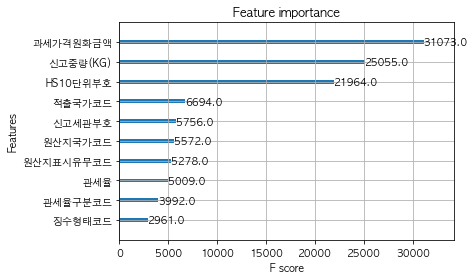

In [42]:
# XGBoost의 plot_importance를 이용하여 우범화물 예측 모델의 변수 중요도 시각화
from xgboost import plot_importance

plot_importance(xgb_c)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

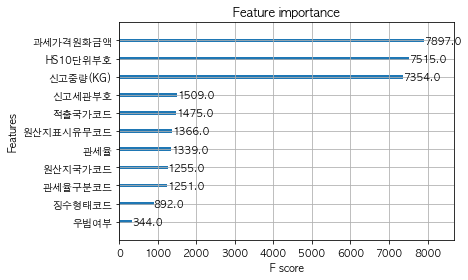

In [43]:
# XGBoost의 plot_importance를 이용하여 핵심적발 예측 모델의 변수 중요도 시각화
plot_importance(xgb_k)

## 4. 데이터 예측

In [44]:
# public 데이터 우범화물 예측
xgb_public_c_pred = xgb_c.predict(df_public_label)
collections.Counter(xgb_public_c_pred)

Counter({0: 6768, 1: 1366})

In [45]:
df_public_label['우범여부'] = xgb_public_c_pred

In [46]:
df_public_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부
0,13,2,2190,15,19,18,1,7.2,6.804836,12.936260,0
1,6,2,786,37,19,18,1,0.0,5.993961,10.326170,0
2,9,5,1851,15,19,18,4,3.2,5.828946,7.867603,0
3,6,2,1736,15,19,0,1,13.0,3.433987,7.815611,0
4,4,2,3308,95,111,5,0,1.3,1.386294,11.363569,0
...,...,...,...,...,...,...,...,...,...,...,...
8129,13,2,1165,15,19,18,4,4.8,6.836259,10.921179,0
8130,9,2,948,50,55,1,4,6.5,8.599879,10.248388,0
8131,6,2,3234,47,55,0,2,8.0,4.548600,8.456179,0
8132,13,6,1685,64,74,10,1,0.0,6.576470,12.193305,0


In [47]:
# public 데이터 핵심적발 예측
xgb_public_k_pred = xgb_k.predict(df_public_label)
collections.Counter(xgb_public_k_pred)

Counter({0: 6768, 1: 1318, 2: 48})

In [48]:
df_public_label['핵심적발'] = xgb_public_k_pred

In [49]:
df_public_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,13,2,2190,15,19,18,1,7.2,6.804836,12.936260,0,0
1,6,2,786,37,19,18,1,0.0,5.993961,10.326170,0,0
2,9,5,1851,15,19,18,4,3.2,5.828946,7.867603,0,0
3,6,2,1736,15,19,0,1,13.0,3.433987,7.815611,0,0
4,4,2,3308,95,111,5,0,1.3,1.386294,11.363569,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8129,13,2,1165,15,19,18,4,4.8,6.836259,10.921179,0,0
8130,9,2,948,50,55,1,4,6.5,8.599879,10.248388,0,0
8131,6,2,3234,47,55,0,2,8.0,4.548600,8.456179,0,0
8132,13,6,1685,64,74,10,1,0.0,6.576470,12.193305,0,0


In [50]:
# 제출 파일로 저장
public_result['우범여부'] = xgb_public_c_pred
public_result['핵심적발'] = xgb_public_k_pred
public_result

,신고번호,우범여부,핵심적발
0,56839011,0,0
1,64859691,0,0
2,99950077,0,0
3,22601387,0,0
4,33240058,0,0
...,...,...,...
8129,95650431,0,0
8130,48093440,0,0
8131,12889495,0,0
8132,39908806,0,0


In [51]:
public_result.to_csv('비둘기.csv')

In [52]:
# private 데이터 우범화물 예측
xgb_private_c_pred = xgb_c.predict(df_private_label)
collections.Counter(xgb_private_c_pred)

Counter({0: 7006, 1: 1475})

In [53]:
df_private_label['우범여부'] = xgb_private_c_pred

In [54]:
df_private_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부
0,13,2,1154,46,91,0,2,8.0,0.693147,7.130659,0
1,6,2,2018,88,104,0,5,8.0,1.740466,7.219898,0
2,13,2,970,15,19,18,2,2.4,9.852247,13.916081,0
3,21,9,1075,15,19,1,2,6.5,5.620401,5.111988,0
4,13,2,3112,15,19,1,1,0.0,3.761200,11.643415,0
...,...,...,...,...,...,...,...,...,...,...,...
8476,13,6,2510,85,19,1,5,0.0,1.163151,4.992471,0
8477,13,2,3504,15,19,18,0,3.2,4.805659,8.254019,0
8478,10,2,81,15,19,18,5,12.0,9.973527,18.591333,0
8479,6,2,2838,15,19,1,0,0.0,3.273364,13.445947,0


In [55]:
# private 데이터 핵심적발 예측
xgb_private_k_pred = xgb_k.predict(df_private_label)
collections.Counter(xgb_private_k_pred)

Counter({0: 7006, 1: 1434, 2: 41})

In [56]:
df_private_label['핵심적발'] = xgb_private_k_pred

In [57]:
df_private_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,13,2,1154,46,91,0,2,8.0,0.693147,7.130659,0,0
1,6,2,2018,88,104,0,5,8.0,1.740466,7.219898,0,0
2,13,2,970,15,19,18,2,2.4,9.852247,13.916081,0,0
3,21,9,1075,15,19,1,2,6.5,5.620401,5.111988,0,0
4,13,2,3112,15,19,1,1,0.0,3.761200,11.643415,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8476,13,6,2510,85,19,1,5,0.0,1.163151,4.992471,0,0
8477,13,2,3504,15,19,18,0,3.2,4.805659,8.254019,0,0
8478,10,2,81,15,19,18,5,12.0,9.973527,18.591333,0,0
8479,6,2,2838,15,19,1,0,0.0,3.273364,13.445947,0,0


In [58]:
# 제출 파일로 저장
private_result['우범여부'] = xgb_private_c_pred
private_result['핵심적발'] = xgb_private_k_pred
private_result

,신고번호,우범여부,핵심적발
0,41256141,0,0
1,20889431,0,0
2,25403940,0,0
3,43489778,0,0
4,94895240,0,0
...,...,...,...
8476,25225594,0,0
8477,17739793,0,0
8478,70427265,0,0
8479,60306302,0,0


In [59]:
private_result.to_csv('비둘기.csv')